<a href="https://colab.research.google.com/github/RohanKulkarni100/StockPricePrediction/blob/main/Trending_Chart_Pattern_Analysis(Minded_Hack)_Sample_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-31-1e4a0b7ca604>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/ChartPatterns/SampleDataGT.csv")
df1.head()

,Unnamed: 0,start,end,pattern
0,0,2020-01-08 10:50:00,2020-01-08 13:00:00,Reverse Head and shoulders
1,1,2020-01-09 10:40:00,2020-01-09 12:45:00,Head and shoulders
2,2,2020-01-15 12:45:00,2020-01-15 14:50:00,Head and shoulders
3,3,2020-01-16 11:00:00,2020-01-16 13:10:00,Reverse Head and shoulders
4,4,2020-01-20 12:05:00,2020-01-20 13:55:00,Head and shoulders


In [ ]:
df1.columns

Index(['Unnamed: 0', 'start', 'end', 'pattern'], dtype='object')

In [ ]:
df1['pattern'].unique()

array(['Reverse Head and shoulders', 'Head and shoulders', 'Double Top',
       'Double Bottom'], dtype=object)

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/ChartPatterns/SampleData.csv")
df2.head()

,Unnamed: 0,open,close,high,low,date
0,0,1032.144200,1032.246108,1038.520819,1025.869489,2020-01-02 09:00:00
1,1,1032.246108,1032.417499,1040.101487,1024.562120,2020-01-02 09:05:00
2,2,1032.417499,1032.375497,1040.023616,1024.769380,2020-01-02 09:10:00
3,3,1032.375497,1032.398605,1033.532570,1031.241532,2020-01-02 09:15:00
4,4,1032.398605,1032.482789,1037.506628,1027.374766,2020-01-02 09:20:00


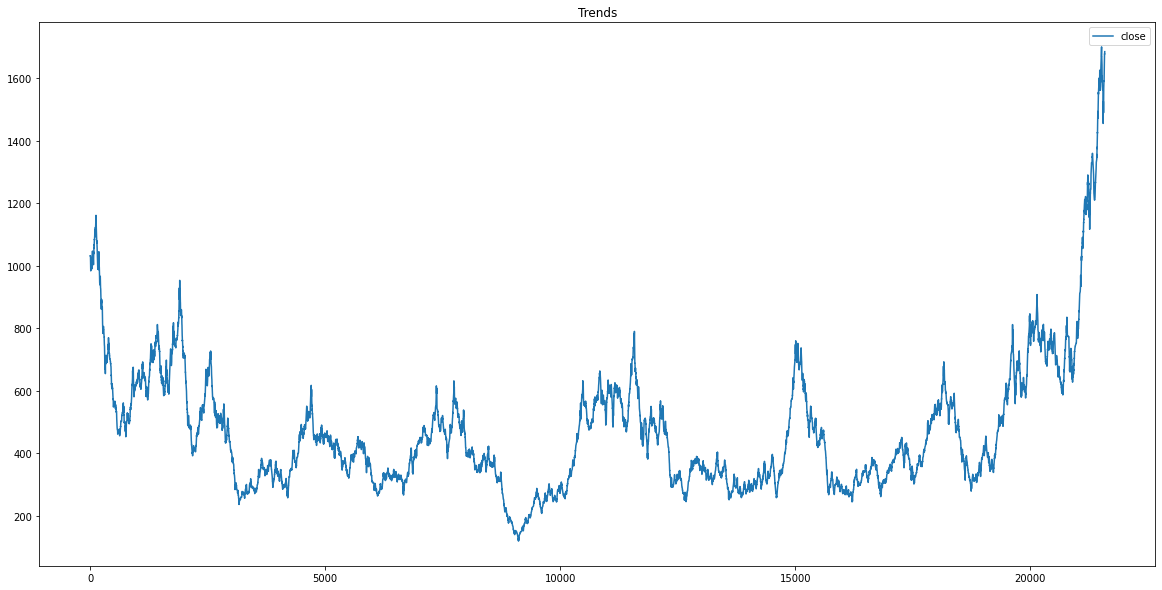

In [ ]:
df2[['close']].plot()
plt.title("Trends")
plt.show()


Text(0.5, 1.0, 'Trends Cumulative Returns')

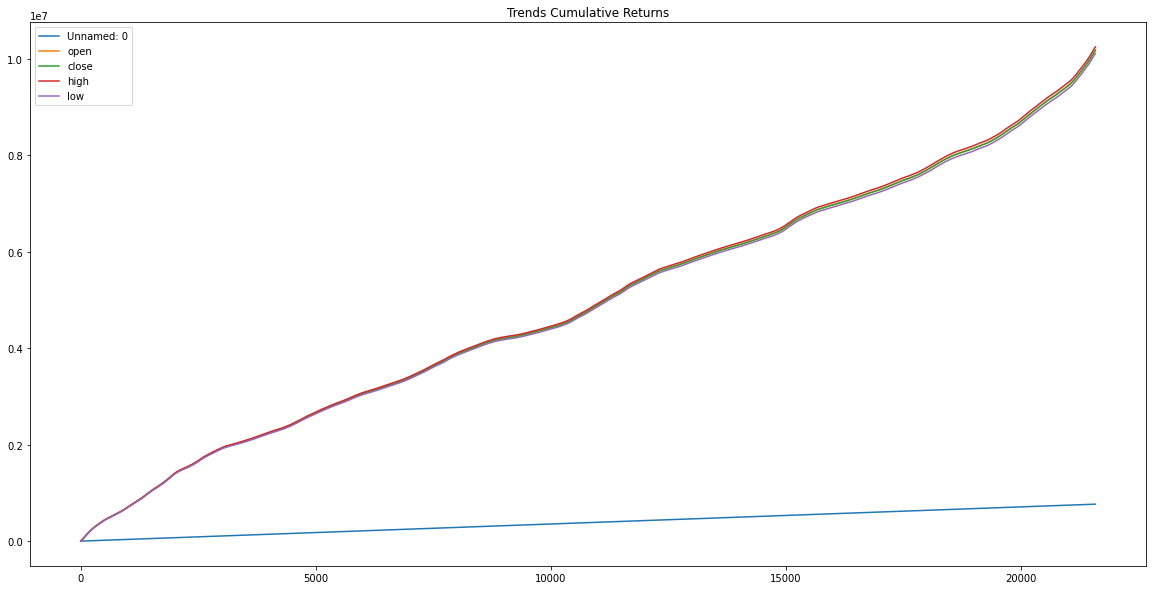

In [ ]:
# Comulative Return
dr = df2.cumsum()
dr.plot()
plt.title('Trends Cumulative Returns')

Text(0.5, 1.0, 'Trends Autocorrelation plot')

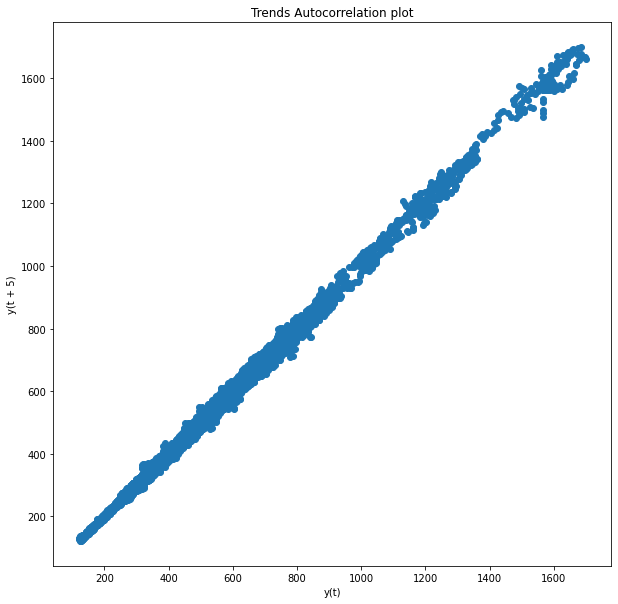

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df2['open'], lag=5)
plt.title('Trends Autocorrelation plot')

In [ ]:
df2['date'][2020]

'2020-02-11 09:20:00'

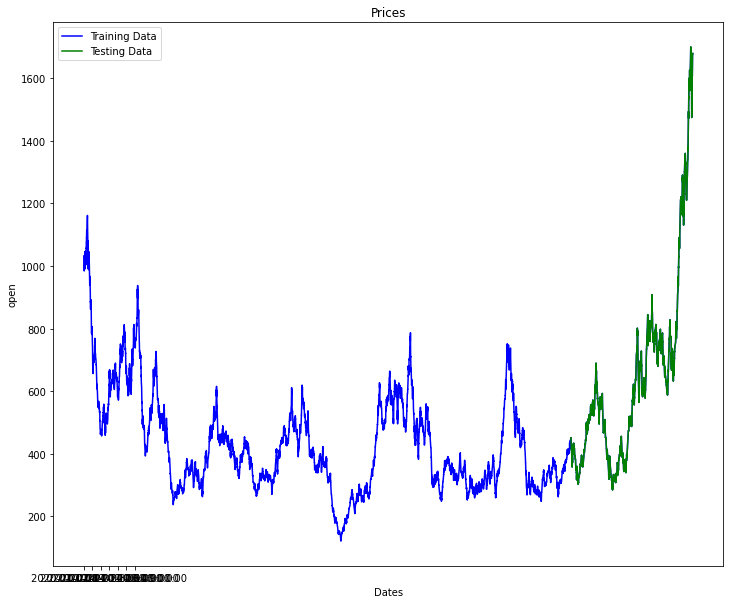

In [ ]:
train_data, test_data = df2[0:int(len(df2)*0.8)], df2[int(len(df2)*0.8):]
plt.figure(figsize=(12,10))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('open')
plt.plot(df2['open'], 'blue', label='Training Data')
plt.plot(test_data['open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df2['date'][0:1857:300])
plt.legend()

In [ ]:
data = df1['start'].str.split(n=1, expand=True)

In [ ]:
data

,0,1
0,2020-01-08,10:50:00
1,2020-01-09,10:40:00
2,2020-01-15,12:45:00
3,2020-01-16,11:00:00
4,2020-01-20,12:05:00
...,...,...
85,2021-02-09,12:50:00
86,2021-02-10,12:20:00
87,2021-02-11,11:00:00
88,2021-02-18,11:10:00


#Starting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df2

,Unnamed: 0,open,close,high,low,date
0,0,1032.144200,1032.246108,1038.520819,1025.869489,2020-01-02 09:00:00
1,1,1032.246108,1032.417499,1040.101487,1024.562120,2020-01-02 09:05:00
2,2,1032.417499,1032.375497,1040.023616,1024.769380,2020-01-02 09:10:00
3,3,1032.375497,1032.398605,1033.532570,1031.241532,2020-01-02 09:15:00
4,4,1032.398605,1032.482789,1037.506628,1027.374766,2020-01-02 09:20:00
...,...,...,...,...,...,...
21581,67,1672.852023,1678.324194,1681.038031,1670.138186,2021-02-24 14:35:00
21582,68,1678.324194,1677.952490,1687.895346,1668.381338,2021-02-24 14:40:00
21583,69,1677.952490,1676.963826,1689.028256,1665.888061,2021-02-24 14:45:00
21584,70,1676.963826,1679.059744,1688.330764,1667.692807,2021-02-24 14:50:00


In [ ]:
df2.columns

Index(['Unnamed: 0', 'open', 'close', 'high', 'low', 'date'], dtype='object')

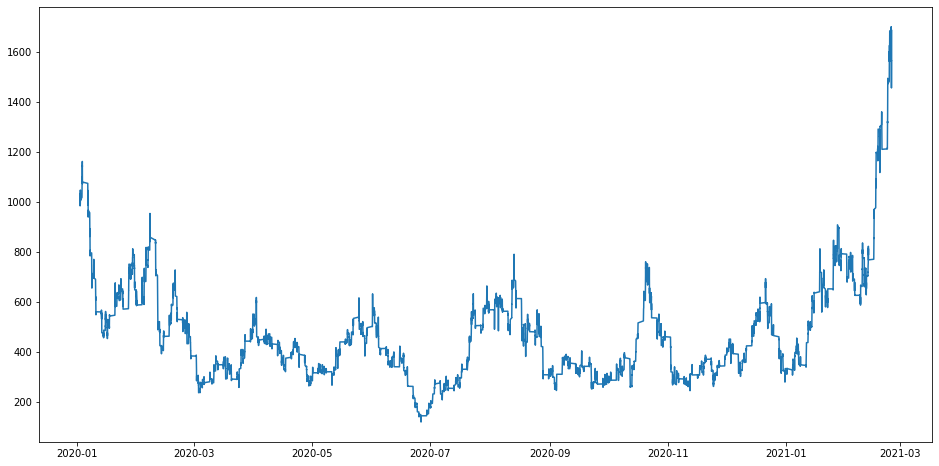

In [ ]:
df2["date"]=pd.to_datetime(df2.date,format="%Y-%m-%d")
df2.index=df2['date']
plt.figure(figsize=(16,8))
plt.plot(df2["close"],label='Close Price history')

In [ ]:
data=df2.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df2)),columns=['date','close'])
for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["close"][i]=data["close"][i]

In [ ]:
import pandas as pd

In [ ]:
stock_data = pd.read_csv("/content/drive/MyDrive/ChartPatterns/SampleData.csv")
stock_data.head()

,Unnamed: 0,open,close,high,low,date
0,0,1032.144200,1032.246108,1038.520819,1025.869489,2020-01-02 09:00:00
1,1,1032.246108,1032.417499,1040.101487,1024.562120,2020-01-02 09:05:00
2,2,1032.417499,1032.375497,1040.023616,1024.769380,2020-01-02 09:10:00
3,3,1032.375497,1032.398605,1033.532570,1031.241532,2020-01-02 09:15:00
4,4,1032.398605,1032.482789,1037.506628,1027.374766,2020-01-02 09:20:00


In [ ]:
stock_data['date'].astype(str)

0        2020-01-02 09:00:00
1        2020-01-02 09:05:00
2        2020-01-02 09:10:00
3        2020-01-02 09:15:00
4        2020-01-02 09:20:00
                ...         
21581    2021-02-24 14:35:00
21582    2021-02-24 14:40:00
21583    2021-02-24 14:45:00
21584    2021-02-24 14:50:00
21585    2021-02-24 14:55:00
Name: date, Length: 21586, dtype: object

In [ ]:
stock_data['date'].dtype

dtype('O')

In [ ]:
from datetime import datetime as dt

In [ ]:
df=stock_data['date'] = pd.to_datetime(stock_data['date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df

0       2020-01-02 09:00:00
1       2020-01-02 09:05:00
2       2020-01-02 09:10:00
3       2020-01-02 09:15:00
4       2020-01-02 09:20:00
                ...        
21581   2021-02-24 14:35:00
21582   2021-02-24 14:40:00
21583   2021-02-24 14:45:00
21584   2021-02-24 14:50:00
21585   2021-02-24 14:55:00
Name: date, Length: 21586, dtype: datetime64[ns]

In [ ]:
# Splitting the date part from DataFrame
stock_data['Date'] = [d.date() for d in stock_data['date']]

# Splitting the time part from DataFrame
stock_data['Time'] = [d.time() for d in stock_data['date']]

In [ ]:
print("Modified DataFrame:\n",stock_data)

Modified DataFrame:
        Unnamed: 0         open        close         high          low  \
0               0  1032.144200  1032.246108  1038.520819  1025.869489   
1               1  1032.246108  1032.417499  1040.101487  1024.562120   
2               2  1032.417499  1032.375497  1040.023616  1024.769380   
3               3  1032.375497  1032.398605  1033.532570  1031.241532   
4               4  1032.398605  1032.482789  1037.506628  1027.374766   
...           ...          ...          ...          ...          ...   
21581          67  1672.852023  1678.324194  1681.038031  1670.138186   
21582          68  1678.324194  1677.952490  1687.895346  1668.381338   
21583          69  1677.952490  1676.963826  1689.028256  1665.888061   
21584          70  1676.963826  1679.059744  1688.330764  1667.692807   
21585          71  1679.059744  1685.062412  1695.667444  1668.454713   

                     date        Date      Time  
0     2020-01-02 09:00:00  2020-01-02  09:00:00  
1 

In [ ]:
stock_data.head()

,Unnamed: 0,open,close,high,low,date,Date,Time
0,0,1032.144200,1032.246108,1038.520819,1025.869489,2020-01-02 09:00:00,2020-01-02,09:00:00
1,1,1032.246108,1032.417499,1040.101487,1024.562120,2020-01-02 09:05:00,2020-01-02,09:05:00
2,2,1032.417499,1032.375497,1040.023616,1024.769380,2020-01-02 09:10:00,2020-01-02,09:10:00
3,3,1032.375497,1032.398605,1033.532570,1031.241532,2020-01-02 09:15:00,2020-01-02,09:15:00
4,4,1032.398605,1032.482789,1037.506628,1027.374766,2020-01-02 09:20:00,2020-01-02,09:20:00


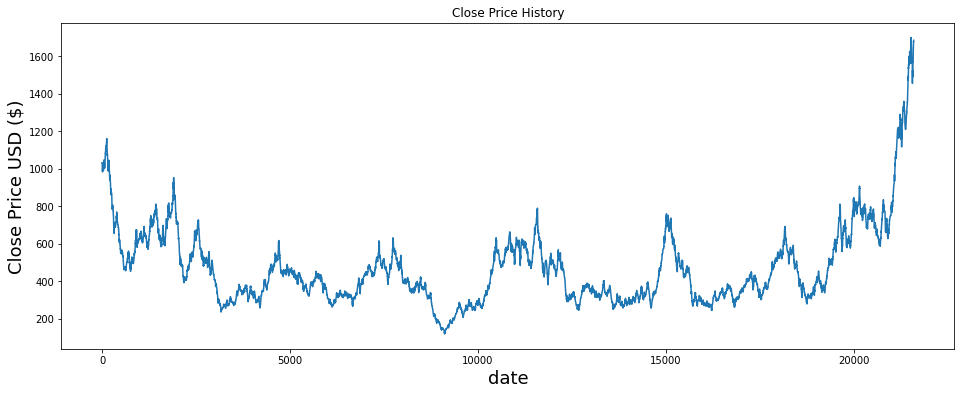

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(stock_data['close'])
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = stock_data.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

20507

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.57735549],
       [0.57746393],
       [0.57743735],
       ...,
       [0.9852569 ],
       [0.98658295],
       [0.99038073]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.57735549, 0.57746393, 0.57743735, 0.57745197, 0.57750524,
       0.5775773 , 0.57763899, 0.57158275, 0.56688375, 0.56311704,
       0.5518998 , 0.55653861, 0.54682104, 0.54834178, 0.55031043,
       0.55687083, 0.56260145, 0.55892358, 0.56581075, 0.56952882,
       0.5738302 , 0.57260917, 0.57252605, 0.57254087, 0.57224585,
       0.57233048, 0.57192817, 0.57178895, 0.57183444, 0.57177928,
       0.57152728, 0.57112983, 0.56773223, 0.56698357, 0.56497284,
       0.56241233, 0.55672919, 0.55092258, 0.55179392, 0.55811472,
       0.55861113, 0.56572945, 0.56621275, 0.5664154 , 0.56862368,
       0.57579487, 0.5820637 , 0.58536926, 0.58236118, 0.58680023,
       0.58369044, 0.58037633, 0.56854863, 0.57060914, 0.5626381 ,
       0.56523981, 0.5636767 , 0.56545381, 0.56718939, 0.56930184])]
[0.5732912732253957]

[array([0.57735549, 0.57746393, 0.57743735, 0.57745197, 0.57750524,
       0.5775773 , 0.57763899, 0.57158275, 0.56688375, 0.56311704,
       0.5518998 , 0.55653861, 0.546

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

20447/20447 [==============================] - 881s 43ms/step - loss: 9.3361e-05


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

34/34 [==============================] - 2s 50ms/step


16.07623224037059

<ipython-input-84-b01fdcfed65c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


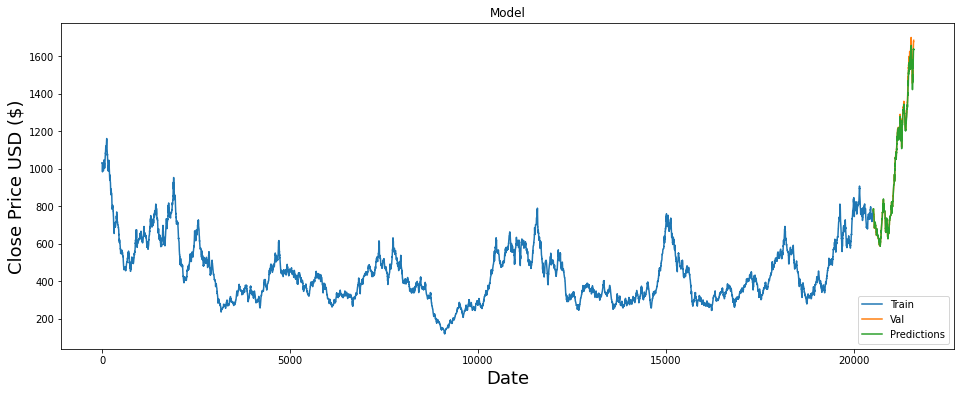

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,close,Predictions
20507,777.536314,777.343323
20508,778.564669,779.332703
20509,780.228205,780.643372
20510,781.334494,782.289062
20511,782.947212,783.242859
...,...,...
21581,1678.324194,1634.348145
21582,1677.952490,1636.729614
21583,1676.963826,1635.285889
21584,1679.059744,1634.279541
